In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%ls 'drive/MyDrive/CE'

 cntrl.csv   df1_app_data.csv   indy_as400.csv  'Tables & Rows.gsheet'


In [14]:
camp= '/content/drive/MyDrive/CE/indy_as400_v1.csv'
cntrl= 
#%cp df1_app_data.csv '/content/drive/MyDrive/'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%ls

drive/  sample_data/


In [99]:

indym= pd.read_excel('Indy Mailed 6.10.2020.xls')
indym['AS400']= indym.AS400.astype('str').unique()
print(indym.AS400.astype('str').tolist())

['5108462', '5108247', '5100103', '5100062', '5109028', '5109035', '5108597', '19107', '5108587', '5108470', '5108010', '18010', '5108725', '19983', '5119000', '19166', '5108991', '18013', '18015', '5109865', '18324', '19638', '5109873', '19359', '5108828', '5108018', '19833', '18020', '19623', '5108234', '5109328', '5120051', '5109381', '5108662', '5108528', '19015', '19264', '5108185', '18742', '19161', '5108908', '19076', '5109830', '19256', '19121', '18029', '5107618', '19148', '5109888', '5109851', '5109838', '5109329', '19143', '5108480', '5107612', '5108479', '19197', '5109807', '5109004', '5108473', '19826', '18035', '18445', '5107652', '19268', '18037', '19827', '19964', '5109023', '5108936', '18039', '5109025', '5109849', '5108918', '19708', '5107627', '5108957', '5108487', '5109869', '18937', '5109845', '5107611', '18041', '18048', '5109857', '18045', '5100041', '5107629', '5108493', '5109475', '5109825', '18049', '19975', '5109829', '18051', '5108827', '18070', '5110725', '

In [100]:
indyr= pd.read_excel('Simpli.fi Indy Campaign June 1 to July 31.xlsx')

In [101]:
indyr['AS400']= indyr.loc[:, 'Geography Geo Fence Name'].apply(lambda x: x[x.rfind('-'):]).str.replace('-','').str.strip().astype(str)

In [102]:
len(indym.AS400.unique())

566

In [103]:
campaign= indym.merge(indyr, on='AS400', how='left')

In [ ]:
campaign.to_csv('indy_mailer2020.csv')

In [ ]:
df_col= ['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id','property_class','payment_type', 'usr_id', 'amount', 'txn_num_daily']

In [ ]:
df = pd.read_csv(, header=None, names= df_col)

In [ ]:
df.head()

,datetime,machine_id,machine_type,room_id,as400id,property_class,payment_type,usr_id,amount,txn_num_daily,txn_period
56,2016-02-29,011-BBM,Dryer,DI-5108779-78,5108779,Class C,App,1014402,1.85,1,before
57,2016-02-29,121-HWX,Dryer,DI-5109901-1,5109901,Class C,App,469489,1.50,1,before
58,2016-02-29,121-HWX,Dryer,DI-5109901-1,5109901,Class C,App,57691,1.50,1,before
59,2016-02-29,121-HWX,Dryer,DI-5109901-1,5109901,Class C,Coin,99999999,3.00,7,before
60,2016-03-01,121-HWX,Dryer,DI-5109901-1,5109901,Class C,Coin,99999999,4.50,3,before


In [ ]:

df.loc[(df.payment_type=='App') & (df.usr_id== '99999999')]

,datetime,machine_id,machine_type,room_id,as400id,property_class,payment_type,usr_id,amount,txn_num_daily,txn_period


In [ ]:
df.property_class.fillna('unknown', inplace= True)

In [ ]:
df.property_class.value_counts()

Class C    2515753
Class B     615298
Class D     505332
Name: property_class, dtype: int64

In [ ]:
df.shape

(3636383, 10)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(3584949, 11)

In [ ]:
df['datetime']= pd.to_datetime(df.datetime)
df['as400id']=df.as400id.astype('str')

In [ ]:
df.shape

(3584949, 11)

In [ ]:
df= df.loc[df.datetime <= pd.datetime.now()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df['txn_period']= None
df.loc[df.datetime.between('1900-04-10', '2020-04-09'), 'txn_period']= 'before'
df.loc[df.datetime.between('2020-04-10', '2020-06-09'), 'txn_period']= 'pre campaign'
df.loc[df.datetime.between('2020-06-10', '2020-08-09'), 'txn_period']= 'campaign'
df.loc[df.datetime.between('2020-08-10', '2020-10-09'), 'txn_period']= '2nd mailer'
df.loc[df.datetime.between('2020-10-10', '2020-12-09'), 'txn_period']= 'post campaign'
df.loc[df.datetime.between('2020-12-10', '2021-08-09'), 'txn_period']= 'after'

In [ ]:
df.txn_period.value_counts(dropna=False)

before           1202420
after             833323
2nd mailer        399332
post campaign     388787
campaign          388230
pre campaign      372857
Name: txn_period, dtype: int64

In [ ]:
df.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'txn_period'],
      dtype='object')

In [ ]:
df.payment_type.unique()

array(['App', 'Coin', 'LaundryCard', 'CreditCard-SR'], dtype=object)

In [ ]:
df['broad_pay_type']= df.payment_type.map({'App': 'App', 'CreditCard-SR': 'Card', 'LaundryCard': 'Card'}).fillna('Other')

In [79]:
order_lst_6= ['before', 'pre campaign', 'campaign', '2nd mailer', 'post campaign', 'after']
order_lst_4= ['pre campaign', 'campaign', '2nd mailer', 'post campaign']

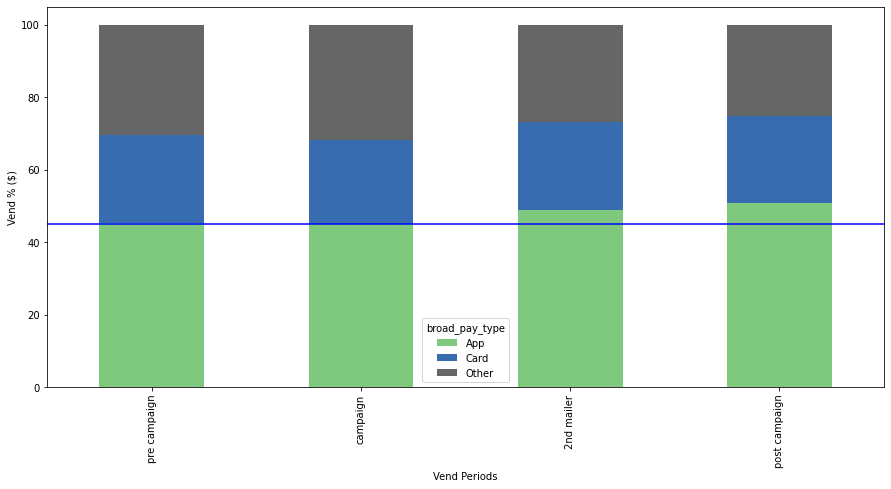

In [ ]:
amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['amount'].agg('sum').reset_index()
amt1= amt1.pivot('txn_period', 'broad_pay_type', 'amount')
amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)

amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Vend Periods', ylabel='Vend % ($)', colormap="Accent")
plt.axhline(45, color='blue')
plt.show()

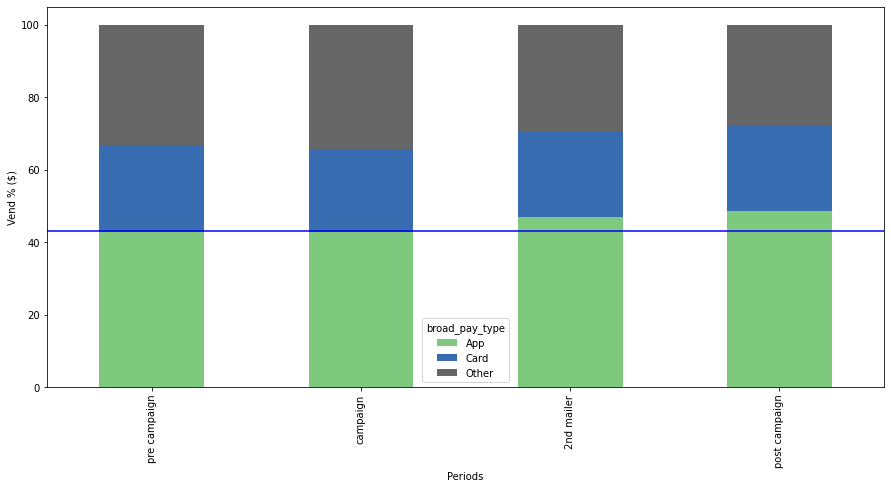

In [ ]:
amt1= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['txn_num_daily'].agg('sum').reset_index()
amt1= amt1.pivot('txn_period', 'broad_pay_type', 'txn_num_daily')
amt1= 100*amt1.div(amt1.sum(axis=1), axis=0)
amt1.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Periods', ylabel='Vend % ($)', colormap="Accent")
plt.axhline(43, color='blue')
plt.show()

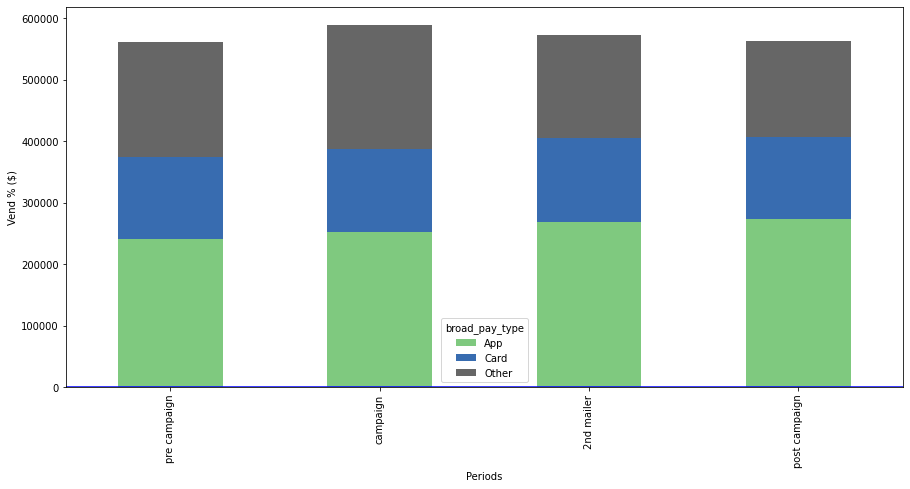

In [ ]:
amt7= df.loc[df.txn_period.notnull()].groupby(['txn_period', 'broad_pay_type'])['txn_num_daily'].agg('sum').reset_index()
amt7= amt7.pivot('txn_period', 'broad_pay_type', 'txn_num_daily')
# amt7= 100*amt1.div(amt1.sum(axis=1), axis=0)
amt7.loc[order_lst_4].plot(kind='bar', stacked= True, figsize=(15,7), xlabel= 'Periods', ylabel='Vend % ($)', colormap="Accent")
plt.axhline(43, color='blue')
plt.show()

In [ ]:
df1= df.loc[df.payment_type=='App']

In [ ]:
order_lst_4

In [ ]:
df1.loc[df1.txn_period.isin(order_lst_4)].groupby(['property_class', 'txn_period'])['amount','txn_num_daily'].agg('sum').reset_index().pivot('property_class','txn_period', ['amount', 'txn_num_daily'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


amount             ... txn_num_daily             
txn_period     2nd mailer   campaign  ... post campaign pre campaign
property_class                        ...                           
Class B          86165.17   80075.81  ...       52953.0      46669.0
Class C         276715.60  259574.07  ...      172562.0     152619.0
Class D          74708.70   69552.60  ...       48430.0      41131.0

[3 rows x 8 columns]

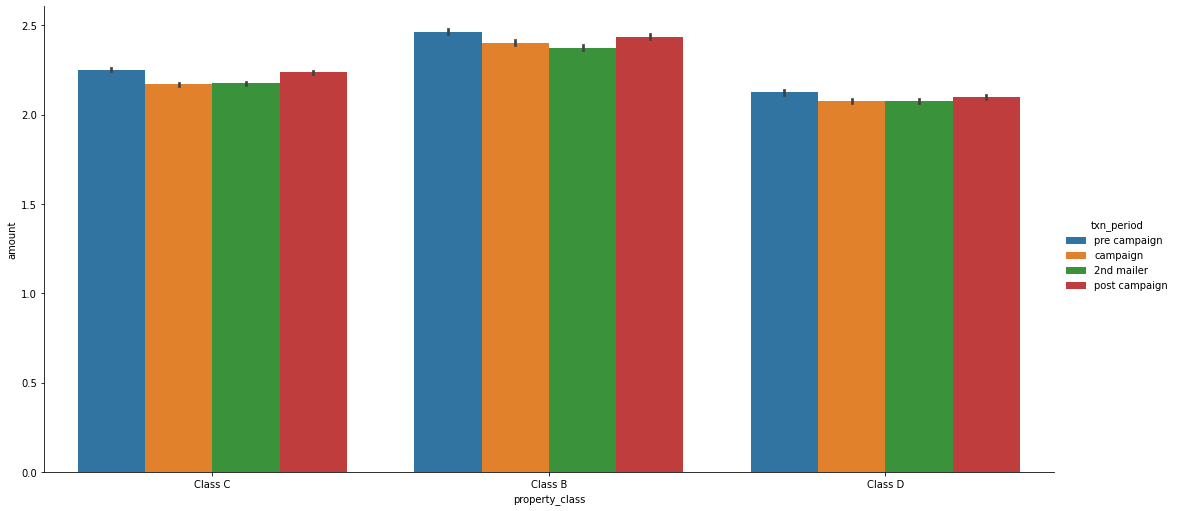

In [ ]:
sns.catplot(x="property_class", y="amount", hue="txn_period", kind="bar", data=df1.loc[df1.txn_period.isin(order_lst_4)],height=7, aspect=2.1)

In [ ]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'txn_period', 'broad_pay_type'],
      dtype='object')

In [ ]:
df1.head()

,datetime,machine_id,machine_type,room_id,as400id,property_class,payment_type,usr_id,amount,txn_num_daily,txn_period,broad_pay_type
56,2016-02-29,011-BBM,Dryer,DI-5108779-78,5108779,Class C,App,1014402,1.85,1,before,App
57,2016-02-29,121-HWX,Dryer,DI-5109901-1,5109901,Class C,App,469489,1.50,1,before,App
58,2016-02-29,121-HWX,Dryer,DI-5109901-1,5109901,Class C,App,57691,1.50,1,before,App
63,2016-03-08,121-HWX,Dryer,DI-5109901-1,5109901,Class C,App,38891,1.50,1,before,App
82,2019-06-14,346-HNY,Washer,DI-19268-1,19268,Class B,App,33373,2.00,1,before,App


In [ ]:
df1.isnull().sum()

datetime          0
machine_id        0
machine_type      0
room_id           0
as400id           0
property_class    0
payment_type      0
usr_id            0
amount            0
txn_num_daily     0
txn_period        0
broad_pay_type    0
dtype: int64

In [ ]:
# df1.loc[:,'period']= None
# df1.loc[df1.datetime.between('2020-04-10', '2020-06-09'), 'period']= 'pre campaign'
# df1.loc[df1.datetime.between('2020-06-10', '2020-08-09'), 'period']= 'campaign'
# df1.loc[df1.datetime.between('2020-08-10', '2020-10-09'), 'period']= '2nd mailer'
# df1.loc[df1.datetime.between('2020-10-10', '2020-12-09'), 'period']= 'post campaign'

In [ ]:
len(df1.usr_id.unique())

64626

In [ ]:
vend_range= df1.groupby('usr_id')['datetime'].agg(['min', 'max']).reset_index().rename(columns={'usr_id': 'usr_id','min':'first_vend', 'max':'last_vend'})

In [ ]:
df1= df1.merge(vend_range, on='usr_id', how='left')

In [ ]:
df1['first_vend_period']= None
df1.loc[df1.first_vend.between('1900-04-10', '2020-04-09'), 'first_vend_period']= 'before'
df1.loc[df1.first_vend.between('2020-04-10', '2020-06-09'), 'first_vend_period']= 'pre campaign'
df1.loc[df1.first_vend.between('2020-06-10', '2020-08-09'), 'first_vend_period']= 'campaign'
df1.loc[df1.first_vend.between('2020-08-10', '2020-10-09'), 'first_vend_period']= '2nd mailer'
df1.loc[df1.first_vend.between('2020-10-10', '2020-12-09'), 'first_vend_period']= 'post campaign'
df1.loc[df1.first_vend.between('2020-12-10', '2021-08-09'), 'first_vend_period']= 'after'

In [140]:
# df1.loc[df1.loc[:,'first_vend'].between('1900-04-10', '2020-04-09'),'first_vend_period']= 'before'

In [ ]:
df1['last_vend_period']= None
df1.loc[df1.last_vend.between('1900-04-10', '2020-04-09'), 'last_vend_period']= 'before'
df1.loc[df1.last_vend.between('2020-04-10', '2020-06-09'), 'last_vend_period']= 'pre campaign'
df1.loc[df1.last_vend.between('2020-06-10', '2020-08-09'), 'last_vend_period']= 'campaign'
df1.loc[df1.last_vend.between('2020-08-10', '2020-10-09'), 'last_vend_period']= '2nd mailer'
df1.loc[df1.last_vend.between('2020-10-10', '2020-12-09'), 'last_vend_period']= 'post campaign'
df1.loc[df1.last_vend.between('2020-12-10', '2021-08-09'), 'last_vend_period']= 'after'

In [ ]:
leading_date= {'pre campaign': '2020-04-10', 'campaign': '2020-06-10', '2nd mailer': '2020-08-10', 'post campaign': '2020-10-10'}

## Daily txn counts first vend period flow through

In [75]:
df1.groupby(['first_vend_period', 'txn_period'])['txn_num_daily'].agg('sum').reset_index().\
pivot('first_vend_period', 'txn_period', 'txn_num_daily').loc[order_lst_6, order_lst_6].fillna(0)

txn_period,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,684639.0,201487.0,168308.0,143224.0,127990.0,226209.0
pre campaign,0.0,38932.0,41954.0,31980.0,25240.0,42221.0
campaign,0.0,0.0,41574.0,45635.0,37856.0,56494.0
2nd mailer,0.0,0.0,0.0,47104.0,49281.0,70420.0
post campaign,0.0,0.0,0.0,0.0,33578.0,62553.0
after,0.0,0.0,0.0,0.0,0.0,121326.0


## amount first vend period flow through

In [77]:
amt2= df1.groupby(['first_vend_period', 'txn_period'])['amount'].agg('sum').reset_index().\
pivot('first_vend_period', 'txn_period', 'amount').loc[order_lst_6, order_lst_6].fillna(0)

In [80]:
amt2

txn_period,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,1095771.0,326969.73,272639.96,231436.06,206645.35,371942.04
pre campaign,0.0,63580.03,68642.25,52339.08,41374.41,69316.53
campaign,0.0,0.00,67920.27,75282.36,62564.94,94524.91
2nd mailer,0.0,0.00,0.00,78531.97,81979.20,119341.91
post campaign,0.0,0.00,0.00,0.00,54836.76,104143.67
after,0.0,0.00,0.00,0.00,0.00,201192.67


In [83]:
amt2= amt2/10000

In [84]:
amt2

txn_period,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,109.5771,32.696973,27.263996,23.143606,20.664535,37.194204
pre campaign,0.0000,6.358003,6.864225,5.233908,4.137441,6.931653
campaign,0.0000,0.000000,6.792027,7.528236,6.256494,9.452491
2nd mailer,0.0000,0.000000,0.000000,7.853197,8.197920,11.934191
post campaign,0.0000,0.000000,0.000000,0.000000,5.483676,10.414367
after,0.0000,0.000000,0.000000,0.000000,0.000000,20.119267


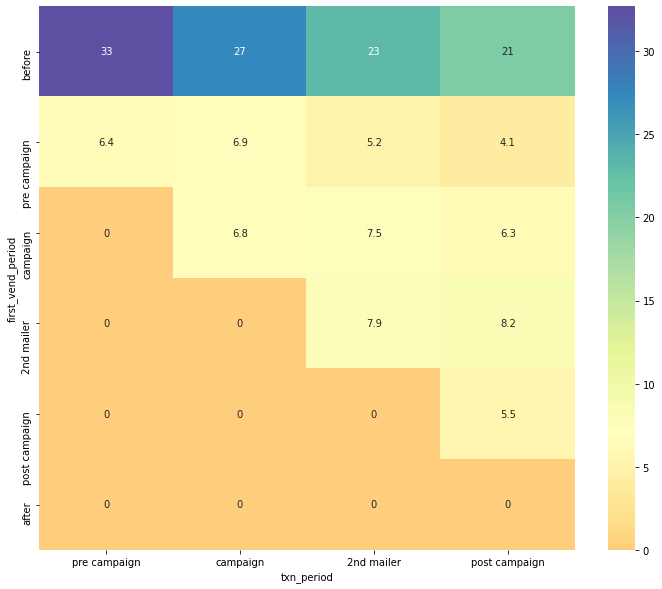

In [92]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(amt2.loc[order_lst_6, order_lst_4], center=7.0,annot=True, ax=ax, cmap='Spectral')

## user count first vend period flow through

In [93]:
amt3= df1.groupby(['first_vend_period', 'txn_period'])['usr_id'].agg('nunique').reset_index().\
pivot('first_vend_period', 'txn_period', 'usr_id').loc[order_lst_6, order_lst_6].fillna(0)

In [94]:
amt3

txn_period,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,37533.0,9588.0,8283.0,6840.0,5962.0,5772.0
pre campaign,0.0,4497.0,2184.0,1609.0,1327.0,1121.0
campaign,0.0,0.0,4862.0,2481.0,1916.0,1691.0
2nd mailer,0.0,0.0,0.0,5192.0,2767.0,2394.0
post campaign,0.0,0.0,0.0,0.0,4008.0,2061.0
after,0.0,0.0,0.0,0.0,0.0,8534.0


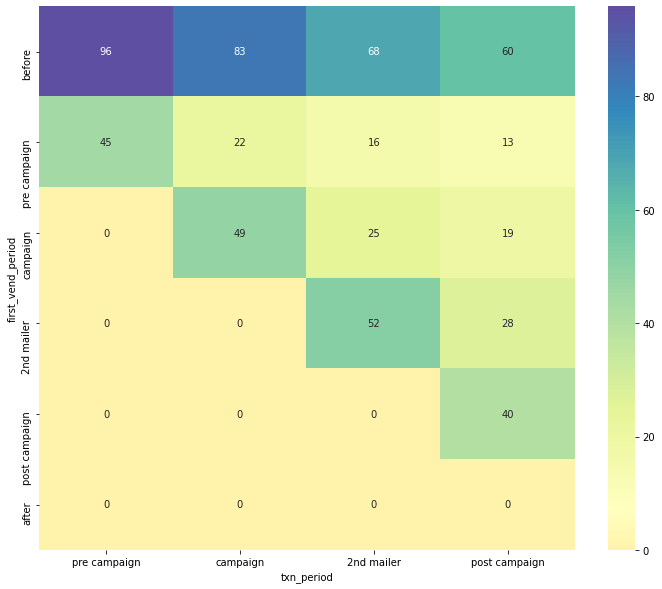

In [95]:
amt3= df1.groupby(['first_vend_period', 'txn_period'])['usr_id'].agg('nunique').reset_index().\
pivot('first_vend_period', 'txn_period', 'usr_id').loc[order_lst_6, order_lst_6].fillna(0)
amt3= amt3/100
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(amt3.loc[order_lst_6, order_lst_4], center=7.0,annot=True, ax=ax, cmap='Spectral')

## Back of the Envelope Model

In [104]:
df2= df1.merge(campaign, left_on='as400id', right_on='AS400')

In [105]:
df3= df2.loc[((df2.last_vend_period=='post campaign') & (df2.first_vend_period.isin(['campaign', '2nd mailer'])))]

In [106]:
df4= df3.groupby(['as400id', 'property_class','SecondMail', 'Performance Impressions','Performance Clicks'])['amount'].agg('sum').reset_index()

In [107]:
df4= pd.get_dummies(df4, columns=['property_class'])

In [108]:
df4['SecondMail']=df4.SecondMail.map({'Y':1, 'N':0})

In [109]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
X=df4.loc[:, ['SecondMail', 'Performance Impressions',
       'Performance Clicks']]
y= df4.amount

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [113]:
lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X_train, y_train)
y_hat = lin_reg_mod.predict(X_test)

In [114]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_hat)))
test_set_r2 = r2_score(y_test, y_hat)

In [115]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_hat)

0.15542488645863273

In [116]:
print('Root Mean Squared Error:', test_set_rmse, 'R Square:', test_set_r2)

Root Mean Squared Error: 255.6130506332382 R Square: 0.15479785983795302


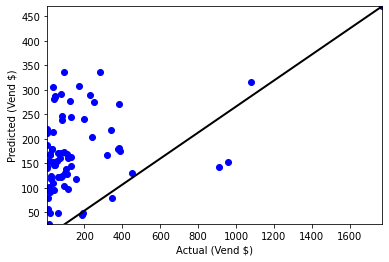

In [117]:
plt.scatter(y_test, y_hat,  color='blue')
plt.plot([0, max(y_test)], [0, max(y_hat)], color = 'black', linewidth = 2)
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_hat), max(y_hat))
plt.xlabel('Actual (Vend $)')
plt.ylabel('Predicted (Vend $)')
plt.show()

In [118]:
df4.columns

Index(['as400id', 'SecondMail', 'Performance Impressions',
       'Performance Clicks', 'amount', 'property_class_Class B',
       'property_class_Class C', 'property_class_Class D'],
      dtype='object')

In [119]:
attr= ['SecondMail', 'Performance Impressions','Performance Clicks']

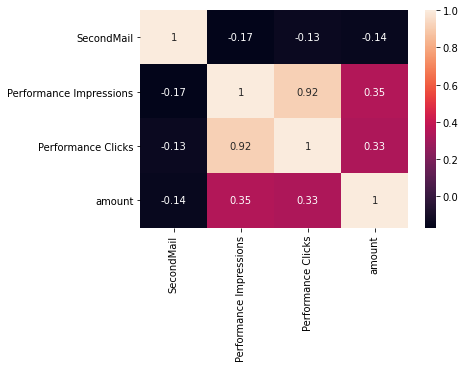

In [120]:
sns.heatmap(df4.loc[:, df4.columns.isin(['SecondMail', 'Performance Impressions','Performance Clicks', 'amount'])].\
            corr(), annot= True)

In [125]:
coeff= [-86.57427454, 354.22485053,  30.12679793]

In [126]:
dict(zip(attr,coeff))

{'Performance Clicks': 30.12679793,
 'Performance Impressions': 354.22485053,
 'SecondMail': -86.57427454}

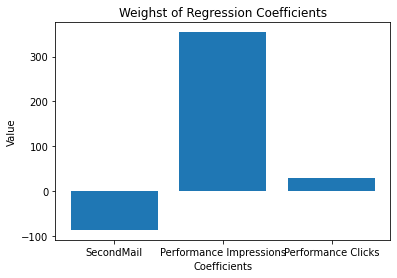

In [127]:
plt.bar(attr, coeff)
plt.xlabel("Coefficients") 
  
# setting y_label as price
plt.ylabel("Value")   
plt.title("Weighst of Regression Coefficients")
plt.show()

## Flythrough Analysis/ Drop Off Analysis- #, $

In [134]:
pd.crosstab(df1.first_vend_period, df1.last_vend_period, df1.usr_id, aggfunc='nunique').loc[order_lst_6, order_lst_4].fillna(0)

last_vend_period,pre campaign,campaign,2nd mailer,post campaign
first_vend_period,,,,
before,1780.0,1717.0,1138.0,969.0
pre campaign,2092.0,572.0,340.0,372.0
campaign,0.0,2120.0,614.0,437.0
2nd mailer,0.0,0.0,2178.0,620.0
post campaign,0.0,0.0,0.0,1947.0
after,0.0,0.0,0.0,0.0


In [135]:
pd.crosstab(df1.first_vend_period, df1.last_vend_period, df1.amount, aggfunc='sum').loc[order_lst_6, order_lst_6].fillna(0)/10000

last_vend_period,before,pre campaign,campaign,2nd mailer,post campaign,after
first_vend_period,,,,,,
before,31.217364,13.440340,19.768426,16.256137,16.302651,153.555496
pre campaign,0.000000,1.479778,1.748960,2.432701,3.797920,20.065871
campaign,0.000000,0.000000,1.598417,1.897232,2.978114,23.555485
2nd mailer,0.000000,0.000000,0.000000,1.635279,2.020345,24.329684
post campaign,0.000000,0.000000,0.000000,0.000000,1.416611,14.481432
after,0.000000,0.000000,0.000000,0.000000,0.000000,20.119267


## Other Stuff

In [136]:
df1.columns

Index(['datetime', 'machine_id', 'machine_type', 'room_id', 'as400id',
       'property_class', 'payment_type', 'usr_id', 'amount', 'txn_num_daily',
       'txn_period', 'broad_pay_type', 'first_vend', 'last_vend',
       'first_vend_period', 'last_vend_period'],
      dtype='object')

In [137]:
df5= df1.loc[df1.usr_id!='99999']

In [138]:
df5=df5.loc[~df5.txn_period.isin(['before', 'after'])]

In [ ]:
dfs=[df5.groupby(['usr_id', 'txn_period'])['amount'].sum(),
df5.groupby(['usr_id', 'txn_period'])['txn_num_daily'].sum()]

In [ ]:
pd.concat(dfs, axis=1).reset_index()

,usr_id,txn_period,amount,txn_num_daily
0,100017,campaign,5.00,3
1,100095,2nd mailer,54.45,32
2,100095,campaign,38.55,23
3,100095,post campaign,43.60,26
4,100095,pre campaign,47.55,28
...,...,...,...,...
61507,99911,pre campaign,4.50,3
61508,99949,2nd mailer,1.75,1
61509,99952,2nd mailer,21.25,12
61510,99952,campaign,9.50,6


In [ ]:
p5=df5.amount.describe(percentiles=[.05,.25,.50,.75,.95]).loc['5%']
p95= df5.amount.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']
df5["amount"] = np.where(df5["amount"] <p5, p5,df5['amount'])
df5["amount"] = np.where(df5["amount"] >p95, p95,df5['amount'])

In [ ]:
p5=df5.txn_num_daily.describe(percentiles=[.05,.25,.50,.75,.95]).loc['5%']
p95= df5.txn_num_daily.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']
df5["txn_num_daily"] = np.where(df5["txn_num_daily"] <p5, p5,df5['txn_num_daily'])
df5["txn_num_daily"] = np.where(df5["txn_num_daily"] >p95, p95,df5['txn_num_daily'])

In [ ]:
df5.txn_num_daily.describe()

count    757242.000000
mean          1.297181
std           0.600816
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: txn_num_daily, dtype: float64

In [ ]:
df5['amt_bkt']= pd.qcut(df5.amount,5, labels=[1,2,3,4,5])
df5['txn_num_bkt']= np.where(df5["txn_num_daily"] > 1, 2 ,1)

In [ ]:
df5['mf_bkt']= df5.txn_num_bkt*10
df5['mf_bkt']= df5['mf_bkt']+df5['txn_num_bkt']

In [ ]:
df5.mf_bkt.value_counts()

11    589798
22    167444
Name: mf_bkt, dtype: int64